## Which variables determine prices for overnight stays on the platform AirBnb?

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
#import AllTogether as t
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy import NaN
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('./listings.csv')


In [5]:
## First we will get a general overview of the data
df.head()


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [6]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [7]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


# What variation in prices exists?

In [8]:
df.price =df.price.apply(lambda x: x.replace('$',''))
df.price =df.price.apply(lambda x: x.replace(',',''))
df.price=pd.to_numeric(df["price"])


Text(0.5,0,'price in $')

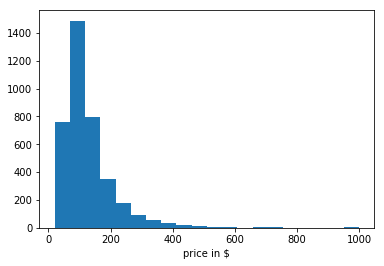

In [9]:
## First, we look at the distribution of prices:

plt.hist(df['price'], bins=20)
plt.xlabel('price in $')
#plt.ylabel('Absolute frequency')

In [19]:
# .. and the minium price
min(df['price'])

20.0

In [10]:
# ... and the maximum price
max(df['price'])

1000.0

In [11]:
## as well as the mean

round(np.mean(df['price']),2)

127.98

# How to deal with missing values and categorical data

Since this is a rich data set, missing values are just ignored for the analysis. This is done with the option missing ='drop'.

Categorical data is transformed to dummy variables with the pandas function get_dummies and droppping the first category as baseline. 

# How does the price of an apartment depend on the characteristics of the apartment?

In [12]:
# We load the data
y = df[["price"]]
x = df[["bathrooms",  "bedrooms", "beds","square_feet", "room_type"]]
x = pd.get_dummies(data=x, drop_first=False)

In [13]:
# We set up the model
model = sm.OLS(y, x, missing='drop')
fitted = model.fit()

In [14]:
# We look at the results
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     45.23
Date:                Mon, 14 Jan 2019   Prob (F-statistic):           6.82e-23
Time:                        12:07:03   Log-Likelihood:                -497.06
No. Observations:                  94   AIC:                             1006.
Df Residuals:                      88   BIC:                             1021.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
bathrooms             

C:\Users\patri\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1633: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\patri\Anaconda3\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\patri\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\patri\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\patri\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


# How do past reviews affect current prices?

In [15]:
# Load the data
y = df[["price"]]
x = df[['number_of_reviews','review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value']]

In [27]:
# Set up th emodel
model = sm.OLS(y, x, missing='drop')
fitted = model.fit()

In [28]:
# Show the results
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     831.3
Date:                Mon, 14 Jan 2019   Prob (F-statistic):               0.00
Time:                        09:53:20   Log-Likelihood:                -18629.
No. Observations:                3158   AIC:                         3.727e+04
Df Residuals:                    3150   BIC:                         3.732e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
number_of_reviews 

# Can hosts with better reviews charge higher prices?

In [29]:
# Load the data
y = df[["price"]]
x = df[["host_is_superhost", 'host_has_profile_pic', "host_identity_verified"]]
x = pd.get_dummies(data=x, drop_first=True)

In [30]:
# We set up the model
model = sm.OLS(y, x, missing='drop')
fitted = model.fit()

In [16]:
# We show the results

print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     45.23
Date:                Mon, 14 Jan 2019   Prob (F-statistic):           6.82e-23
Time:                        12:08:51   Log-Likelihood:                -497.06
No. Observations:                  94   AIC:                             1006.
Df Residuals:                      88   BIC:                             1021.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
bathrooms             

# Can we build a simple prediction model that can accurately predict prices on AirBnb?

In [18]:
# Load the data
df_new = df[["bathrooms",  "bedrooms", "beds","square_feet", "room_type", "host_is_superhost", 'host_has_profile_pic', "host_identity_verified", 'number_of_reviews','review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', "price"]]
df_new=df_new.dropna(axis = 0, how ='any')


In [42]:
x = df_new[["bathrooms",  "bedrooms", "beds","square_feet", "room_type", "host_is_superhost", 'host_has_profile_pic', "host_identity_verified", 'number_of_reviews','review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value']]
x = pd.get_dummies(data=x, drop_first=True)
y =  df_new["price"]

In [43]:
# split the data in test and training data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [47]:
# Set up the model and print its out-of-sample accuracy
model = LinearRegression()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.7404208144090856